In [1]:
# user_id, order_dt,order_products,order_amount
# time, 1997.1月到 -1998.6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')  #change plot style

In [2]:
columns = ['user_id', 'order_dt', 'order_products', 'order_amount']
df = pd.read_table('CDNOW_master.txt', names = columns, sep = '\s+')
df.head()
# date type 
# users may purchase several times a day

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [3]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [5]:
df['order_date'] = pd.to_datetime(df['order_dt'], format = '%Y%m%d')
df['month'] = df['order_date'].astype('datetime64[M]')
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


Text(0.5, 1.0, 'monthly user')

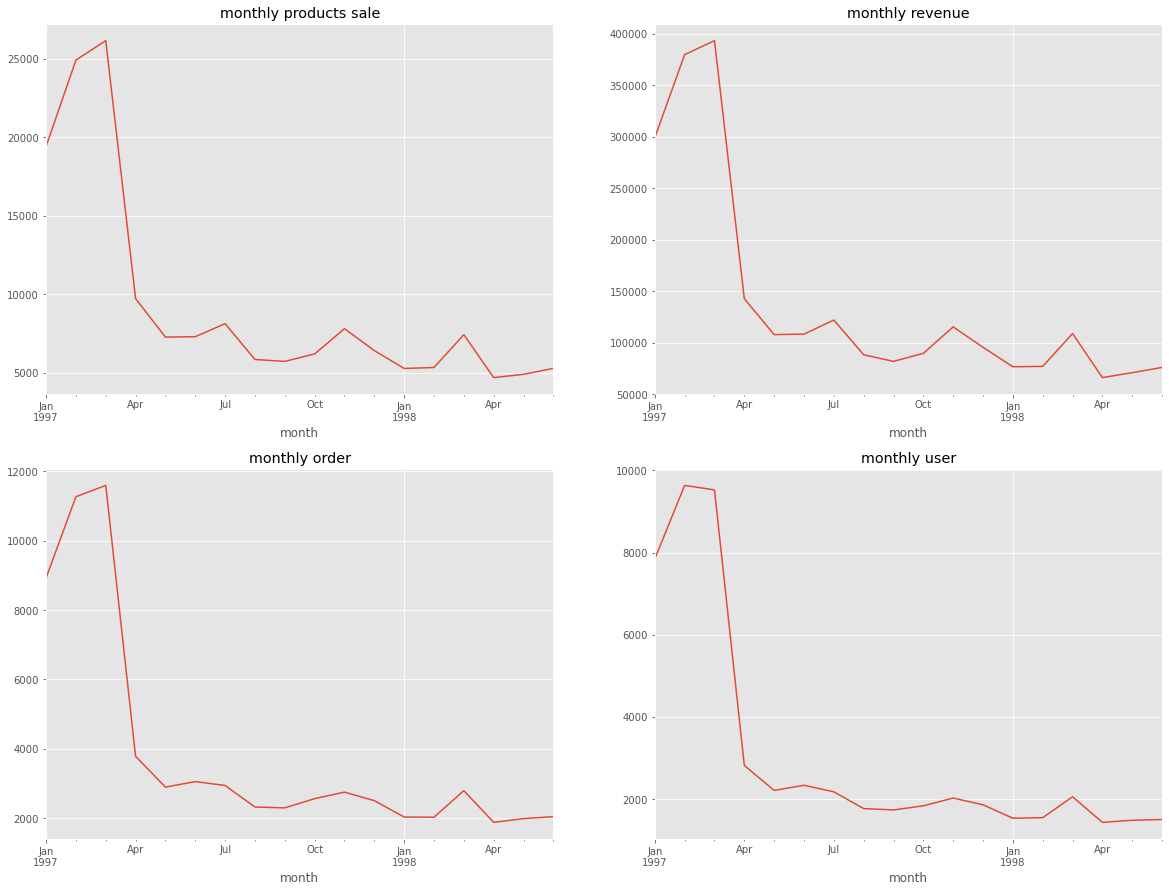

In [6]:
# Trend analysis（monthly）
# Calculate the key metrics by month: monthly products sale, monthly revenue, monthly order, monthly user

plt.figure(figsize=(20,15))

plt.subplot(221)
df.groupby(by='month')['order_products'].sum().plot()
plt.title('monthly products sale')

plt.subplot(222)
df.groupby(by='month')['order_amount'].sum().plot()
plt.title('monthly revenue')

plt.subplot(223)
df.groupby(by='month')['user_id'].count().plot()
plt.title('monthly order')

plt.subplot(224)
df.groupby(by='month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot()
plt.title('monthly user')



In [7]:
# User analysis

user_group = df.groupby(by='user_id').sum()

In [8]:
user_group.describe()

,order_dt,order_products,order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


In [9]:
# The total number of customer is 23570, the average of products per user is 7, the median is 3
# The average revenue contrbiution per user is 106, the median is 43
user_group.head()

,order_dt,order_products,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


<AxesSubplot:xlabel='order_products', ylabel='order_amount'>

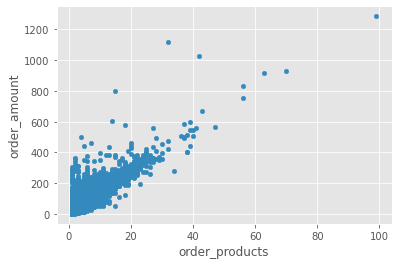

In [10]:
# The scatter plot of order_products and order_amount
# x-axis is order_products，y-axis is order_amount
# Based on the plot，the order_amount and order_products are in linear relation

df.plot(kind='scatter', x='order_products', y='order_amount')


<h2> The consumption distribution of customer</h2>



<AxesSubplot:xlabel='order products', ylabel='Frequency'>

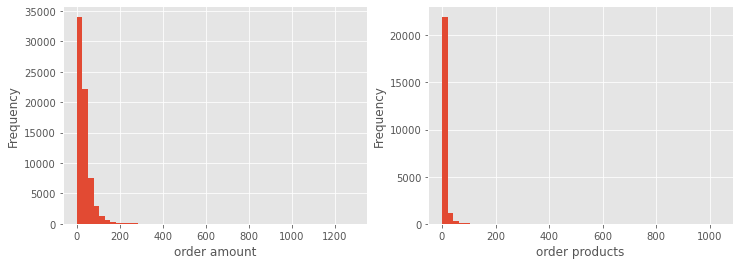

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.xlabel('order amount')
df['order_amount'].plot(kind='hist', bins=50)
# From the first plot, the consumption of most customer is less than 100

plt.subplot(122)
plt.xlabel('order products')
df.groupby(by='user_id')['order_products'].sum().plot(kind='hist', bins=50)
# The order_products of most customer is less than 50


<h2> The revenue contribution of customer </h2>


In [12]:

user_amount_sum = df.groupby(by='user_id')['order_amount'].sum().sort_values().reset_index()
user_amount_sum

,user_id,order_amount
0,10175,0.00
1,4559,0.00
2,1948,0.00
3,925,0.00
4,10798,0.00
...,...,...
23565,7931,6497.18
23566,19339,6552.70
23567,7983,6973.07
23568,14048,8976.33


In [13]:
# np.cumsum(a) or cumsum(a) accumulator

a = [1,2,3,4,5,6,7]
print(np.cumsum(a))

[ 1  3  6 10 15 21 28]


In [14]:
user_amount_sum['amount_cumsum'] = user_amount_sum['order_amount'].cumsum()
user_amount_sum

,user_id,order_amount,amount_cumsum
0,10175,0.00,0.00
1,4559,0.00,0.00
2,1948,0.00,0.00
3,925,0.00,0.00
4,10798,0.00,0.00
...,...,...,...
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70


In [15]:
amount_total = user_amount_sum['amount_cumsum'].max()
user_amount_sum['prop'] = user_amount_sum.apply(lambda x: x['amount_cumsum']/amount_total, axis = 1)
user_amount_sum


,user_id,order_amount,amount_cumsum,prop
0,10175,0.00,0.00,0.000000
1,4559,0.00,0.00,0.000000
2,1948,0.00,0.00,0.000000
3,925,0.00,0.00,0.000000
4,10798,0.00,0.00,0.000000
...,...,...,...,...
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404


<AxesSubplot:>

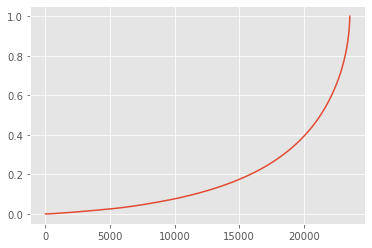

In [16]:
user_amount_sum['prop'].plot()
# According to the plot, the 85% of the customer contribute 40% of the revenue, the rest 15% customer contribute 60% of the revenue 

<h1> Customer behavior pattern </h1>

## 1. The first shopping time 

<AxesSubplot:>

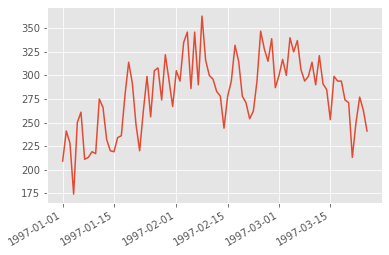

In [17]:

df.groupby(by='user_id')['order_date'].min().value_counts().plot()

# From 1997-01-01 to 1997-02-10, the number of first shopping customer is in increading trend, after that, the trend began to go down

## 2. The last shopping time

<AxesSubplot:>

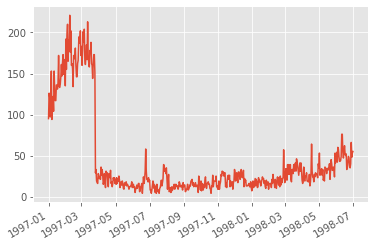

In [18]:
df.groupby(by='user_id')['order_date'].max().value_counts().plot()

# The last time shopping of most customer is within the first 3 month, which indicate the website does not have too many loyal customers
# The number of last shopping customer is increasing, which means the website is losing its customer

# Customer classification

## 1. Build up RFM model

In [19]:
# rfm = df.pivot_table(index = 'user_id',
#                     values = ['order_products', 'order_amount', 'order_date'],
#                     aggfunc= {
#                         'order_date':'max',
#                         'order_products':'sum',
#                         'order_amount':'sum'
#                     })

rfm = df.groupby(by='user_id').agg({'order_date':'max', 'order_products':'sum', 'order_amount':'sum'}).reset_index()
rfm.head()

,user_id,order_date,order_products,order_amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,6,89.00
2,3,1998-05-28,16,156.46
3,4,1997-12-12,7,100.50
4,5,1998-01-03,29,385.61


In [20]:
rfm['R'] = (rfm['order_date'].max() - rfm['order_date'])/np.timedelta64(1, 'D')
rfm.rename(columns = {'order_products':'F', 'order_amount':'M'}, inplace = True)
rfm.head()

,user_id,order_date,F,M,R
0,1,1997-01-01,1,11.77,545.0
1,2,1997-01-12,6,89.00,534.0
2,3,1998-05-28,16,156.46,33.0
3,4,1997-12-12,7,100.50,200.0
4,5,1998-01-03,29,385.61,178.0


In [21]:
def label_R(x):
    if(x<=0):
        return '1'
    else:
        return '0'
    
def label_M_and_F(x):
    if(x>=0):
        return '1'
    else:
        return '0'
    
rfm['R_label'] = (rfm['R']-rfm['R'].mean()).apply(lambda x: label_R(x))
rfm['F_label'] = (rfm['F']-rfm['F'].mean()).apply(lambda x: label_M_and_F(x))
rfm['M_label'] = (rfm['M']-rfm['M'].mean()).apply(lambda x: label_M_and_F(x))

rfm['label'] = rfm['R_label']+rfm['F_label']+rfm['M_label']
rfm.head()

,user_id,order_date,F,M,R,R_label,F_label,M_label,label
0,1,1997-01-01,1,11.77,545.0,0,0,0,000
1,2,1997-01-12,6,89.00,534.0,0,0,0,000
2,3,1998-05-28,16,156.46,33.0,1,1,1,111
3,4,1997-12-12,7,100.50,200.0,1,0,0,100
4,5,1998-01-03,29,385.61,178.0,1,1,1,111


In [22]:
rfm_label_count = rfm.groupby('label')['user_id'].count().reset_index()
rfm_label_count['percent'] = (rfm_label_count['user_id']/sum(rfm_label_count['user_id'])) * 100
rfm_label_count
# According to the table below, 60% customers are with 000 label, 20% customers are with 111 label, and 14% customers are with 100 label


,label,user_id,percent
0,000,14074,59.711498
1,001,241,1.022486
2,010,77,0.326686
3,011,787,3.338990
4,100,3300,14.000849
5,101,331,1.404328
6,110,206,0.873992
7,111,4554,19.321171


## 2. New user, active user, return user analysis

In [23]:
# New user，first shopping customer 
# Active user, shopping within a time period
# Unactive，does not shopping within a time period
# Return user, shopping again after a time period

In [24]:
df_counts = df.pivot_table(
    index = 'user_id',
    columns = 'month',
    values = 'order_dt',
    aggfunc = 'count').fillna(0)

df_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_purchase = df_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [26]:
def active_status(data): #data, argument represents the entire row
    status = []
    for i in range(18):
        if data[i] == 0: #does not shopping in current month
            if len(status) == 0:
                status.append('unreg')
            else:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
                
        else: #has shopping record in current month
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status, index=df_purchase.columns)


purchase_status = df_purchase.apply(active_status, axis=1)
purchase_status.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [27]:
purchase_status_new = purchase_status.replace('unreg', np.NaN)
purchase_status_new.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [28]:
purchase_status_count = purchase_status_new.apply(lambda x: pd.value_counts(x))
purchase_status_count

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


<AxesSubplot:xlabel='month'>

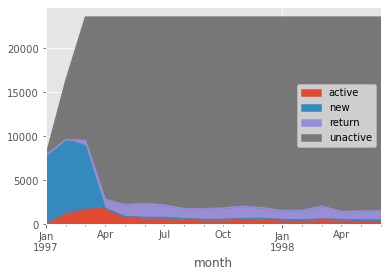

In [29]:
purchase_status_count.T.fillna(0).plot.area() 

# With the first three month, active users and new users are the majority; Start from April, active users and new users started to decrease and remained steady
# Return users are generally appeared after March and stayed steady, they are the important customers of website


In [30]:
rate = purchase_status_count.T.fillna(0).apply(lambda x: x/x.sum(), axis=1)
rate

,active,new,return,unactive
month,,,,
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220


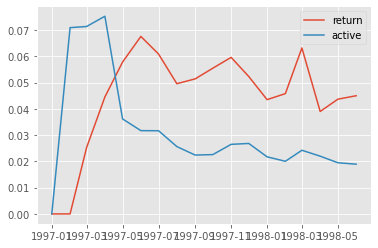

In [31]:
plt.plot(rate['return'], label='return')
plt.plot(rate['active'], label='active')
plt.legend()

# In the frist 5 month, the return users were growing, after that, the steady rate is around 5%
# In the first 3 month, the active users were growing, after April, active users decreased a lot, the stready rate is 2.5%
# When the website operates normally, the return users were the double of active users


## 3. Shopping cycle

In [32]:
df.head(10)

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01
5,3,19970402,2,19.54,1997-04-02,1997-04-01
6,3,19971115,5,57.45,1997-11-15,1997-11-01
7,3,19971125,4,20.96,1997-11-25,1997-11-01
8,3,19980528,1,16.99,1998-05-28,1998-05-01
9,4,19970101,2,29.33,1997-01-01,1997-01-01


In [33]:
order_diff = df.groupby(by='user_id').apply(lambda x: x['order_date']-x['order_date'].shift())
order_diff.head(10)



user_id   
1        0        NaT
2        1        NaT
         2     0 days
3        3        NaT
         4    87 days
         5     3 days
         6   227 days
         7    10 days
         8   184 days
4        9        NaT
Name: order_date, dtype: timedelta64[ns]

In [34]:
order_diff.describe()
# The average shopping cycle is 68 days, the median is 31 days

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_date, dtype: object

<AxesSubplot:>

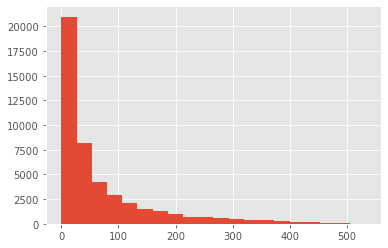

In [35]:
(order_diff/np.timedelta64(1,'D')).hist(bins=20)

## 4. Users' life cycle

In [36]:
df_lifespan = df.groupby(by='user_id')['order_date'].agg(['min', 'max'])
df_lifespan.head()

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


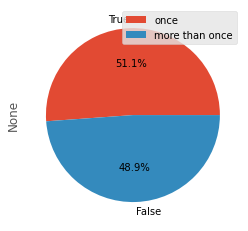

In [37]:
(df_lifespan['max']==df_lifespan['min']).value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(['once','more than once'])

# 51.1% customers only shopped once

In [38]:
(df_lifespan['max']-df_lifespan['min']).describe()

# The average life cycle is 134 days, the median is 0
# Customers with life cycle longer than 75% percentile (294 days) are important users, website should pay attention to them
# The data only records the users' shopping history who registered in the first 3 month

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object

Text(0, 0.5, 'user_amount')

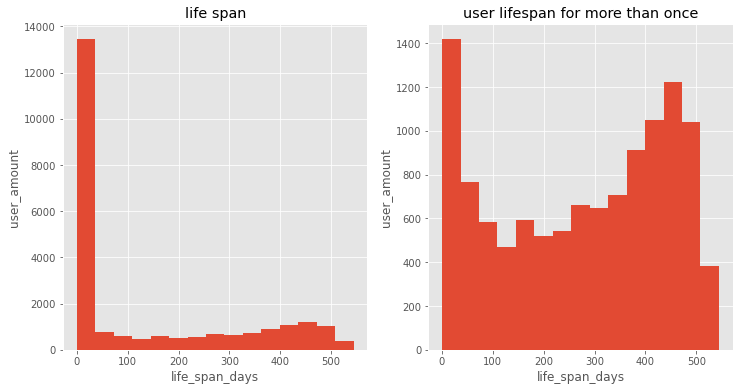

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(121)
((df_lifespan['max']-df_lifespan['min'])/np.timedelta64(1,'D')).hist(bins=15)
plt.title('life span')
plt.xlabel('life_span_days')
plt.ylabel('user_amount')


plt.subplot(122)
u_1=(df_lifespan['max']-df_lifespan['min']).reset_index()[0]/np.timedelta64(1,'D')
u_1[u_1>0].hist(bins=15)

plt.title('user lifespan for more than once')
plt.xlabel('life_span_days')
plt.ylabel('user_amount')


## 5. Repurchase rate

In [40]:
# Repurchase rate within month, number of customer who shopping more then once（not consider customer who does not shopping）/ the number of customer who has shopping history


In [41]:
df_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
purchase_r = df_counts.applymap(lambda x: 1 if x > 1 else np.NaN if x==0 else 0) 
purchase_r

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
purchase_r.count()

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
dtype: int64

In [44]:
purchase_r.sum()

month
1997-01-01     844.0
1997-02-01    1178.0
1997-03-01    1479.0
1997-04-01     631.0
1997-05-01     436.0
1997-06-01     458.0
1997-07-01     469.0
1997-08-01     355.0
1997-09-01     352.0
1997-10-01     380.0
1997-11-01     410.0
1997-12-01     410.0
1998-01-01     324.0
1998-02-01     315.0
1998-03-01     473.0
1998-04-01     286.0
1998-05-01     298.0
1998-06-01     323.0
dtype: float64

In [45]:
purchase_r_rate = purchase_r.sum()/purchase_r.count()
purchase_r_rate

month
1997-01-01    0.107571
1997-02-01    0.122288
1997-03-01    0.155292
1997-04-01    0.223600
1997-05-01    0.196929
1997-06-01    0.195810
1997-07-01    0.215138
1997-08-01    0.200339
1997-09-01    0.202415
1997-10-01    0.206634
1997-11-01    0.202170
1997-12-01    0.219957
1998-01-01    0.210800
1998-02-01    0.203095
1998-03-01    0.229612
1998-04-01    0.199026
1998-05-01    0.200269
1998-06-01    0.214475
dtype: float64

<AxesSubplot:xlabel='month'>

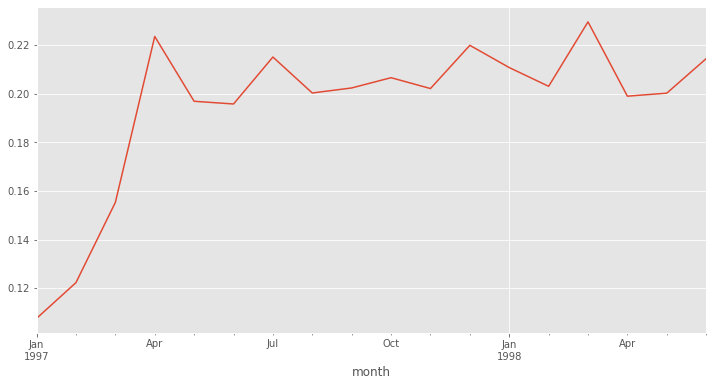

In [46]:
purchase_r_rate.plot(figsize=(12,6))
# In the first 3 month, the repurchase rate was increasing, after that, the steady rate was around 20% ~ 22%

In [47]:
# Repurchase rate between month
# the number of customer who shopping in both this month and next month/the number of customer who shopping in this month
df_purchase

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
def purchase_back(data):
    status = []
    for i in range(17):
        if data[i] == 1: 
            if data[i+1] == 1:
                status.append(1) 
            elif data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN) 
    status.append(np.NaN)
    return pd.Series(status, df_purchase.columns)

purchase_back = df_purchase.apply(purchase_back, axis=1)
purchase_back

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
purchase_back.sum()/purchase_back.count()

month
1997-01-01    0.147464
1997-02-01    0.174504
1997-03-01    0.186161
1997-04-01    0.301914
1997-05-01    0.337398
1997-06-01    0.318940
1997-07-01    0.277064
1997-08-01    0.297968
1997-09-01    0.305923
1997-10-01    0.339315
1997-11-01    0.311637
1997-12-01    0.274678
1998-01-01    0.307092
1998-02-01    0.368150
1998-03-01    0.251456
1998-04-01    0.319415
1998-05-01    0.299731
1998-06-01         NaN
dtype: float64

<AxesSubplot:xlabel='month'>

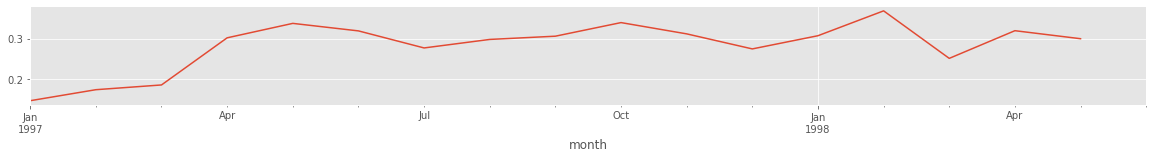

In [51]:
plt.figure(figsize=(20,4))
plt.subplot(211)
(purchase_back.sum()/purchase_back.count()).plot(label='Repurchase rate between month')
# The repurchase rate between month was around 30%
